In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('store-sales-time-series-forecasting/train.csv', parse_dates=['date'])
test = pd.read_csv('store-sales-time-series-forecasting/test.csv', parse_dates=['date'])
transactions = pd.read_csv('store-sales-time-series-forecasting/transactions.csv')
stores = pd.read_csv('store-sales-time-series-forecasting/stores.csv')
oil = pd.read_csv('store-sales-time-series-forecasting/oil.csv')
holidays = pd.read_csv('store-sales-time-series-forecasting/holidays_events.csv', parse_dates=['date'])

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [4]:
families = train['family'].drop_duplicates()
families

0                     AUTOMOTIVE
1                      BABY CARE
2                         BEAUTY
3                      BEVERAGES
4                          BOOKS
5                   BREAD/BAKERY
6                    CELEBRATION
7                       CLEANING
8                          DAIRY
9                           DELI
10                          EGGS
11                  FROZEN FOODS
12                     GROCERY I
13                    GROCERY II
14                      HARDWARE
15            HOME AND KITCHEN I
16           HOME AND KITCHEN II
17               HOME APPLIANCES
18                     HOME CARE
19                    LADIESWEAR
20               LAWN AND GARDEN
21                      LINGERIE
22              LIQUOR,WINE,BEER
23                     MAGAZINES
24                         MEATS
25                 PERSONAL CARE
26                  PET SUPPLIES
27       PLAYERS AND ELECTRONICS
28                       POULTRY
29                PREPARED FOODS
30        

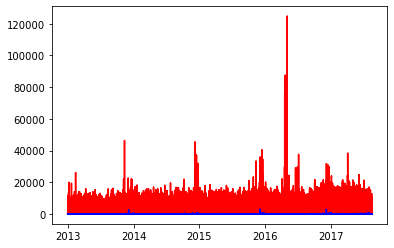

In [5]:
grocery1 = train.loc[train.family=='GROCERY I']
grocery2 = train.loc[train.family=='GROCERY II']

plt.plot(grocery1.date, grocery1.sales, c='red')
plt.plot(grocery2.date, grocery2.sales, c='blue')

In [6]:
from sklearn.preprocessing import OneHotEncoder

features = pd.DataFrame(train[['date','store_nbr']].drop_duplicates()).reset_index()
ohe = OneHotEncoder()
features['weekday'] = features['date'].apply(lambda d:d.weekday())
encoded = pd.DataFrame(ohe.fit_transform(features[['weekday']]).toarray(), columns=['sun','mon','tue','wed','thu','fri','sat'])
features = features.join(encoded).drop(columns=['weekday', 'index'])
features

,date,store_nbr,sun,mon,tue,wed,thu,fri,sat
0,2013-01-01,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-01,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-01,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-01,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-01,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
90931,2017-08-15,54,0.0,1.0,0.0,0.0,0.0,0.0,0.0
90932,2017-08-15,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0
90933,2017-08-15,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0
90934,2017-08-15,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
promotion_info = train.pivot_table(columns='family', values='onpromotion', index=['date', 'store_nbr'])
promotion_info

family                AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS  \
date       store_nbr                                                    
2013-01-01 1                   0          0       0          0      0   
           2                   0          0       0          0      0   
           3                   0          0       0          0      0   
           4                   0          0       0          0      0   
           5                   0          0       0          0      0   
...                          ...        ...     ...        ...    ...   
2017-08-15 50                  0          0       2         13      0   
           51                  0          0       1         12      0   
           52                  0          0       1         13      0   
           53                  0          0       1          9      0   
           54                  0          0       0         23      0   

family                BREAD/BAKERY  CELEBRATION  CLEANING  DAIRY  DELI  ...  \
date       store_nbr                                                    ...   
2013-01-01 1                     0            0         0      0     0  ...   
           2                     0            0         0      0     0  ...   
           3                     0            0         0      0     0  ...   
           4                     0            0         0      0     0  ...   
           5                     0            0         0      0     0  ...   
...                            ...          ...       ...    ...   ...  ...   
2017-08-15 50                   10            0        10     23     6  ...   
           51                   10            0         9     25     8  ...   
           52                   11            0         9     26     8  ...   
           53                   10            0        11     18     9  ...   
           54                    9            0        22     10     5  ...   

family                MAGAZINES  MEATS  PERSONAL CARE  PET SUPPLIES  \
date       store_nbr                                                  
2013-01-01 1                  0      0              0             0   
           2                  0      0              0             0   
           3                  0      0              0             0   
           4                  0      0              0             0   
           5                  0      0              0             0   
...                         ...    ...            ...           ...   
2017-08-15 50                 0      0             12             0   
           51                 0      0              9             0   
           52                 0      0             12             0   
           53                 0      0              6             0   
           54                 0      0              5             0   

family                PLAYERS AND ELECTRONICS  POULTRY  PREPARED FOODS  \
date       store_nbr                                                     
2013-01-01 1                                0        0               0   
           2                                0        0               0   
           3                                0        0               0   
           4                                0        0               0   
           5                                0        0               0   
...                                       ...      ...             ...   
2017-08-15 50                               0        0               0   
           51                               1        0               0   
           52                               0        0               0   
           53                               0        0               0   
           54                               0        0               0   

family                PRODUCE  SCHOOL AND OFFICE SUPPLIES  SEAFOOD  
date       store_nbr                                              

In [8]:
features = pd.merge(features.set_index(['date','store_nbr']), promotion_info, left_index=True, right_index=True)

In [9]:
sales_info = train.pivot_table(columns='family', values='sales', index=['date', 'store_nbr'])
sales_info

family                AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS  \
date       store_nbr                                                    
2013-01-01 1                 0.0        0.0     0.0        0.0    0.0   
           2                 0.0        0.0     0.0        0.0    0.0   
           3                 0.0        0.0     0.0        0.0    0.0   
           4                 0.0        0.0     0.0        0.0    0.0   
           5                 0.0        0.0     0.0        0.0    0.0   
...                          ...        ...     ...        ...    ...   
2017-08-15 50               11.0        0.0    16.0     3661.0    0.0   
           51               11.0        0.0     2.0     3860.0    0.0   
           52                2.0        0.0     4.0     3744.0    0.0   
           53                9.0        0.0     7.0     1646.0    0.0   
           54                8.0        0.0     0.0     4332.0    0.0   

family                BREAD/BAKERY  CELEBRATION  CLEANING   DAIRY     DELI  \
date       store_nbr                                                         
2013-01-01 1                 0.000          0.0       0.0     0.0    0.000   
           2                 0.000          0.0       0.0     0.0    0.000   
           3                 0.000          0.0       0.0     0.0    0.000   
           4                 0.000          0.0       0.0     0.0    0.000   
           5                 0.000          0.0       0.0     0.0    0.000   
...                            ...          ...       ...     ...      ...   
2017-08-15 50              466.130         45.0    1322.0  1018.0  429.619   
           51              704.801         16.0    1357.0  1377.0  217.886   
           52              756.481         15.0    1412.0  1053.0  298.611   
           53              380.199          4.0     706.0   431.0  186.868   
           54              304.000          4.0    1415.0   261.0  222.026   

family                ...  MAGAZINES    MEATS  PERSONAL CARE  PET SUPPLIES  \
date       store_nbr  ...                                                    
2013-01-01 1          ...        0.0    0.000            0.0           0.0   
           2          ...        0.0    0.000            0.0           0.0   
           3          ...        0.0    0.000            0.0           0.0   
           4          ...        0.0    0.000            0.0           0.0   
           5          ...        0.0    0.000            0.0           0.0   
...                   ...        ...      ...            ...           ...   
2017-08-15 50         ...       13.0  425.802          396.0           9.0   
           51         ...       13.0  567.849          234.0          15.0   
           52         ...       19.0  435.828          278.0           9.0   
           53         ...        5.0  185.798          153.0           5.0   
           54         ...        2.0   57.842          169.0           0.0   

family                PLAYERS AND ELECTRONICS  POULTRY  PREPARED FOODS  \
date       store_nbr                                                     
2013-01-01 1                              0.0    0.000           0.000   
           2                              0.0    0.000           0.000   
           3                              0.0    0.000           0.000   
           4                              0.0    0.000           0.000   
           5                              0.0    0.000           0.000   
...                                       ...      ...             ...   
2017-08-15 50                            22.0  356.510          73.852   
           51                            25.0  686.941          91.976   
           52                            20.0  397.340         104.418   
           53                             5.0  148.015          37.820   
           54                             2.0   59.619          94.000   

family                 PRODUCE  SCHOOL AND OFFICE SUPPLIE

In [10]:
features = pd.merge(features, sales_info, left_index=True, right_index=True)

In [11]:
test_features = pd.DataFrame(test[['date','store_nbr']].drop_duplicates()).reset_index()
ohe = OneHotEncoder()
test_features['weekday'] = test_features['date'].apply(lambda d:d.weekday())
encoded = pd.DataFrame(ohe.fit_transform(test_features[['weekday']]).toarray())
test_features = test_features.join(encoded).drop(columns=['index','weekday']).set_index(['date', 'store_nbr'])

test_promotion_info = test.pivot_table(columns='family', values='onpromotion', index=['date', 'store_nbr'])
test_features = pd.merge(test_features, test_promotion_info, left_index=True, right_index=True)
test_features

0    1    2    3    4    5    6  AUTOMOTIVE  \
date       store_nbr                                                  
2017-08-16 1          0.0  0.0  1.0  0.0  0.0  0.0  0.0           0   
           10         0.0  0.0  1.0  0.0  0.0  0.0  0.0           0   
           11         0.0  0.0  1.0  0.0  0.0  0.0  0.0           0   
           12         0.0  0.0  1.0  0.0  0.0  0.0  0.0           0   
           13         0.0  0.0  1.0  0.0  0.0  0.0  0.0           0   
...                   ...  ...  ...  ...  ...  ...  ...         ...   
2017-08-31 54         0.0  0.0  0.0  1.0  0.0  0.0  0.0           0   
           6          0.0  0.0  0.0  1.0  0.0  0.0  0.0           0   
           7          0.0  0.0  0.0  1.0  0.0  0.0  0.0           0   
           8          0.0  0.0  0.0  1.0  0.0  0.0  0.0           0   
           9          0.0  0.0  0.0  1.0  0.0  0.0  0.0           0   

                      BABY CARE  BEAUTY  ...  MAGAZINES  MEATS  PERSONAL CARE  \
date       store_nbr                     ...                                    
2017-08-16 1                  0       2  ...          0      0             18   
           10                 0       2  ...          0      0             19   
           11                 0       2  ...          0      0             18   
           12                 0       2  ...          0      0             15   
           13                 0       2  ...          0      0             20   
...                         ...     ...  ...        ...    ...            ...   
2017-08-31 54                 0       0  ...          0      9              9   
           6                  0       1  ...          0      0             13   
           7                  0       1  ...          0      0             10   
           8                  0       1  ...          0      0              9   
           9                  0       1  ...          0     20             14   

                      PET SUPPLIES  PLAYERS AND ELECTRONICS  POULTRY  \
date       store_nbr                                                   
2017-08-16 1                     0                        0        0   
           10                    0                        0        0   
           11                    0                        1        0   
           12                    0                        0        1   
           13                    0                        0        0   
...                            ...                      ...      ...   
2017-08-31 54                    0                        0        0   
           6                     0                        0        0   
           7                     0                        0        0   
           8                     0                        0        0   
           9                     0                        0        1   

                      PREPARED FOODS  PRODUCE  SCHOOL AND OFFICE SUPPLIES  \
date       store_nbr                                                        
2017-08-16 1                       0      256                          14   
           10                      0      230                          14   
           11                      0      163                          14   
           12                      0      219                          14   
           13                      0      244                          14   
...                              ...      ...                         ...   
2017-08-31 54                      0        1                           0   
           6                       0        2                           0   
           7                       0        2                           0   
           8                       0        3                           0   
           9                       0        1                           9   

                      SEAFOOD  
date       store_nbr           
2017-08-16 1                0  
           

In [12]:
features.to_csv('sales_train.csv')
test_features.to_csv('sales_test.csv')

In [68]:
features.reset_index(inplace=True)
test_features.reset_index(inplace=True)

In [74]:
training_data = []
for n in test_features.store_nbr.drop_duplicates().values:
    training_data.append(features[features.store_nbr==n].drop(columns=['store_nbr','date']))
training_data[0]

,sun,mon,tue,wed,thu,fri,sat,AUTOMOTIVE_x,BABY CARE_x,BEAUTY_x,...,MAGAZINES_y,MEATS_y,PERSONAL CARE_y,PET SUPPLIES_y,PLAYERS AND ELECTRONICS_y,POULTRY_y,PREPARED FOODS_y,PRODUCE_y,SCHOOL AND OFFICE SUPPLIES_y,SEAFOOD_y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000,0.0,0.000000
54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,369.10100,194.0,0.0,0.0,247.29700,47.000000,0.000,0.0,38.029000
108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,...,0.0,272.31900,153.0,0.0,0.0,187.27800,63.000000,0.000,0.0,17.366001
162,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,...,0.0,454.17200,88.0,0.0,0.0,258.02300,67.000000,0.000,0.0,29.907001
216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,...,0.0,328.94000,141.0,0.0,0.0,212.33301,66.000000,0.000,0.0,24.842000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90666,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,...,4.0,385.99402,53.0,5.0,3.0,259.11800,24.963001,1115.334,0.0,19.424000
90720,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,...,6.0,211.75600,227.0,3.0,6.0,217.66400,48.058000,1762.493,0.0,20.150000
90774,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,...,4.0,88.18200,45.0,2.0,0.0,115.75800,20.346000,986.669,0.0,11.378000
90828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,8.0,192.76300,159.0,3.0,6.0,270.04700,72.004000,2611.755,0.0,14.129000


In [75]:
testing_data = []
for n in test_features.store_nbr.drop_duplicates().values:
    testing_data.append(test_features[test_features.store_nbr==n].drop(columns=['store_nbr','date']))
testing_data[0]

,0,1,2,3,4,5,6,AUTOMOTIVE,BABY CARE,BEAUTY,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,2,...,0,0,18,0,0,0,0,256,14,0
54,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,...,0,0,7,0,0,1,0,6,0,0
108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,...,0,48,9,0,1,41,0,5,0,7
162,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,...,0,0,9,0,1,0,0,6,0,0
216,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,...,0,0,7,0,0,0,0,5,0,0
270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,11,0,1,0,0,3,0,0
324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,9,0,2,1,0,3,0,0
378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,8,0,0,0,0,211,0,0
432,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,...,0,0,7,0,0,0,0,3,0,1
486,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,...,0,49,7,0,0,36,0,1,0,5


In [76]:
for i in range(len(training_data)):
    training_data[i].to_csv(f'train/df_{i}.csv')
    
for i in range(len(testing_data)):
    testing_data[i].to_csv(f'test/df_{i}.csv')